In [2]:
import os
os.chdir('C:/Users\My Pc\Desktop\python')

In [1]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling 
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [91]:
# reading dataset
dataset = pd.read_csv('customer_churn.csv')

In [4]:
dataset.shape

(3333, 21)

In [5]:
dataset.head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [6]:
dataset.dtypes.value_counts()

int64      8
float64    8
object     4
bool       1
dtype: int64

In [7]:
# checking for duplicate row
dup=dataset[dataset.duplicated()]
dup.shape

(0, 21)

In [8]:
# checking for missing values
dataset.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
dataset.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [10]:
# checking class distribution
dataset['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [92]:
del dataset['phone number']

In [12]:
dataset.shape

(3333, 20)

categorical variables

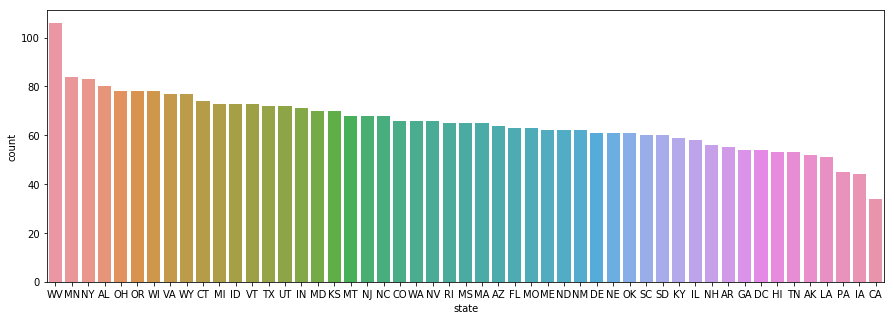

In [13]:
plt.figure(figsize=(15,5))
sns.countplot('state', data=dataset, order= dataset['state'].value_counts().index)

In [14]:
dataset['state'].nunique()

51

In [15]:
dataset1 = dataset[dataset['churn'] == True]

In [16]:
dataset1.head(4)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True


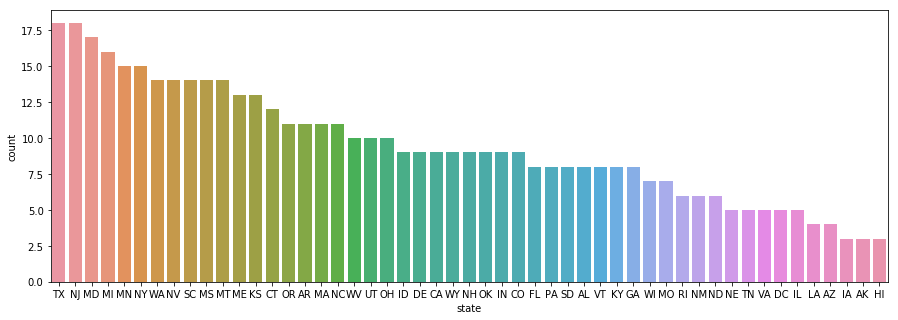

In [17]:
plt.figure(figsize=(15,5))
sns.countplot('state', data = dataset1, order = dataset1['state'].value_counts().index)

In [93]:
dataset['region']=np.nan
reg_max = ['NJ','TX','MD','MI']
reg_mid1 = ['MN','NY','MS','SC','MT','WA','NV','KS','ME','CT','MA','AR','NC','OR']
reg_mid2 = ['OH','UT','OK','CA','DE','ID','CO','WY','NH','IN','PA','SD','VT','AL','KY','FL','GA']
reg_min = ['WV','MO','WI','RI','ND','NM','DC','TN','VA','IL','NE','LA','AZ','AK','HI','IA']
def state_dummy(state):
    if state in reg_max:
        return 'rmax'
    elif state in reg_mid1:
        return 'rmed1'
    elif state in reg_mid2:
        return 'rmed2'
    else: return 'rmin'
    
dataset['region'] = dataset['state'].apply(state_dummy)
    

In [94]:
dataset['region'].value_counts()

rmed2    1083
rmin     1003
rmed1     964
rmax      283
Name: region, dtype: int64

<Figure size 1440x360 with 0 Axes>

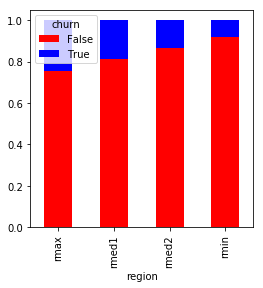

In [20]:
plt.figure(figsize=(20,5))

app_type=pd.crosstab(dataset['region'],dataset['churn'])
app_type.div(app_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4), color = ['red','blue'])
plt.show()

In [95]:
del dataset['state']

no     0.90309
yes    0.09691
Name: international plan, dtype: float64


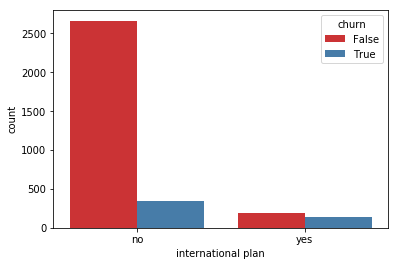

In [22]:
print(dataset['international plan'].value_counts(normalize=True))
sns.countplot('international plan', data=dataset, hue = 'churn', palette='Set1')

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


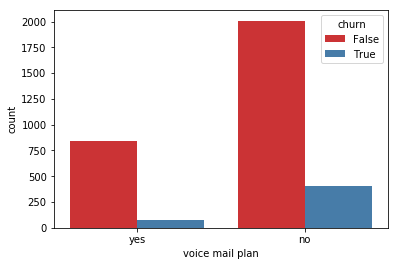

In [23]:
print(dataset['voice mail plan'].value_counts(normalize=True))
sns.countplot('voice mail plan', data=dataset, hue = 'churn', palette='Set1')

<Figure size 1440x360 with 0 Axes>

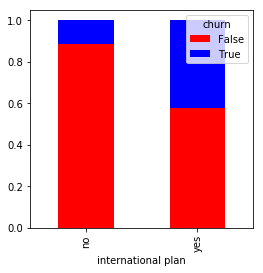

In [24]:
plt.figure(figsize=(20,5))

app_type=pd.crosstab(dataset['international plan'],dataset['churn'])
app_type.div(app_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4), color = ['red','blue'])
plt.show()

In [25]:
x=dataset.columns
x

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'region'],
      dtype='object')

In [26]:
pandas_profiling.ProfileReport(dataset1)

Number of variables,21
Number of observations,483
Total Missing (%),0.0%
Total size in memory,76.0 KiB
Average record size in memory,161.2 B
Numeric,13
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [9]:
#converting region in binary
dataset = pd.concat([dataset,pd.get_dummies(dataset['region'], prefix='region')],axis=1)
del dataset['region']

In [28]:
dataset.head(5)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region_rmax,region_rmed1,region_rmed2,region_rmin
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,False,0,1,0,0
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,False,0,0,1,0
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,False,1,0,0,0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,False,0,0,1,0
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,False,0,0,1,0


In [10]:
#converting variables
x=dataset.columns
le = LabelEncoder()
for i in x:
    if dataset[i].dtypes==np.bool or dataset[i].dtypes==np.object:
        dataset[i]=le.fit_transform(dataset[i])

In [30]:
dataset.head(4)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region_rmax,region_rmed1,region_rmed2,region_rmin
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,0,0,1,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,0,0,0,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,0,1,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,0,0,0,1,0


In [31]:
dataset.dtypes.value_counts()

int64      9
float64    8
uint8      4
int32      2
dtype: int64

In [34]:
for i in range(len(dataset.columns)):
    v=vif(np.matrix(dataset[:]),i)
    print("VIF of {}: {}".format(dataset.columns[i],round(v,2)))

VIF of account length: 1.01
VIF of area code: 1.01
VIF of international plan: 1.09
VIF of voice mail plan: 11.95
VIF of number vmail messages: 11.92
VIF of total day minutes: 10477668.45
VIF of total day calls: 1.01
VIF of total day charge: 10477669.95
VIF of total eve minutes: 2241790.85
VIF of total eve calls: 1.0
VIF of total eve charge: 2241790.07
VIF of total night minutes: 640052.65
VIF of total night calls: 1.0
VIF of total night charge: 640053.91
VIF of total intl minutes: 69153.43
VIF of total intl calls: 1.01
VIF of total intl charge: 69153.93
VIF of customer service calls: 1.06
VIF of churn: 1.24
VIF of region_rmax: 22.78
VIF of region_rmed1: 74.53
VIF of region_rmed2: 83.93
VIF of region_rmin: 77.33


In [11]:
dataset1 = dataset.drop(['region_rmed1','total day charge','total eve charge','total night charge','total intl charge','number vmail messages'], axis = 1)

In [12]:
y=dataset1['churn']
x=dataset1.drop(columns='churn')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=123, stratify=y, test_size=0.25)

In [39]:
model = DecisionTreeClassifier(random_state=123)

In [40]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [42]:
y_pred = model.predict(x_test)

In [45]:
y_pred_prob = model.predict_proba(x_test)[:,1]

In [46]:
# changing probability 
new_y_pred = []
for i in range(len(y_pred)):
    if y_pred_prob[i]<0.8:
        new_y_pred.append(0)
    else:
        new_y_pred.append(1)

In [47]:
accuracy_score(y_test, new_y_pred)

0.9160671462829736

In [49]:
train_acc = []
test_acc = []
f1_scr = []
for depth in range(2,15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))

In [50]:
df = pd.DataFrame({'max_depth': range(2,15), 'train_acc': train_acc, 'test_acc': test_acc, 'F1_score': f1_scr})

In [51]:
df

,max_depth,train_acc,test_acc,F1_score
0,2,0.882353,0.874101,0.355828
1,3,0.903561,0.913669,0.600000
2,4,0.929172,0.920863,0.666667
3,5,0.953982,0.942446,0.793103
4,6,0.963986,0.949640,0.814159
5,7,0.968788,0.952038,0.821429
6,8,0.976391,0.948441,0.812227
7,9,0.978391,0.948441,0.813853
8,10,0.979992,0.946043,0.805195
9,11,0.983193,0.941247,0.794979


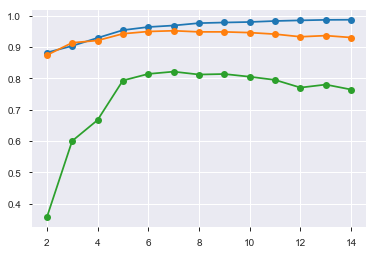

In [53]:
plt.plot(df['max_depth'], df['train_acc'], marker = 'o')
plt.plot(df['max_depth'], df['test_acc'], marker = 'o')
plt.plot(df['max_depth'], df['F1_score'], marker = 'o' )

In [93]:
train_acc = []
test_acc = []
f1_scr = []
for depth in range(2,15):
    model = DecisionTreeClassifier( max_depth=7, max_leaf_nodes= depth, random_state=10)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))

In [94]:
df = pd.DataFrame({'max_depth': range(2,15), 'train_acc': train_acc, 'test_acc': test_acc, 'F1_score':f1_scr})

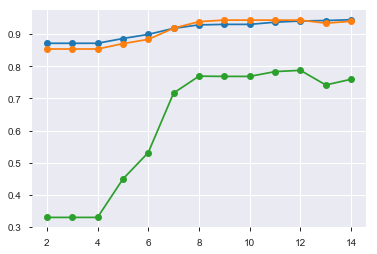

In [95]:
plt.plot(df['max_depth'], df['train_acc'], marker = 'o')
plt.plot(df['max_depth'], df['test_acc'], marker = 'o')
plt.plot(df['max_depth'], df['F1_score'], marker = 'o' )

In [96]:
df


,max_depth,train_acc,test_acc,F1_score
0,2,0.871549,0.853717,0.329670
1,3,0.871549,0.853717,0.329670
2,4,0.871549,0.853717,0.329670
3,5,0.886355,0.870504,0.448980
4,6,0.899160,0.883693,0.531401
5,7,0.917967,0.918465,0.716667
6,8,0.928772,0.938849,0.769231
7,9,0.930372,0.943645,0.768473
8,10,0.930372,0.943645,0.768473
9,11,0.937175,0.943645,0.783410


In [97]:
train_acc = []
test_acc = []
f1_scr = []
for depth in range(2,15):
    model = DecisionTreeClassifier( max_depth=7, max_leaf_nodes=12,max_features= depth , random_state=10)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))

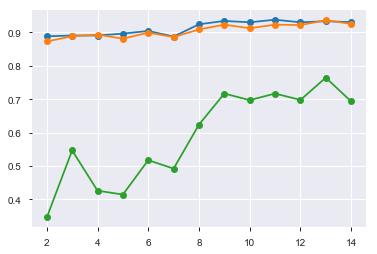

In [99]:
df = pd.DataFrame({'max_depth': range(2,15), 'train_acc': train_acc, 'test_acc': test_acc, 'F1_score': f1_scr})

plt.plot(df['max_depth'], df['train_acc'], marker = 'o')
plt.plot(df['max_depth'], df['test_acc'], marker = 'o')
plt.plot(df['max_depth'], df['F1_score'], marker = 'o' )

In [100]:
df


,max_depth,train_acc,test_acc,F1_score
0,2,0.888355,0.872902,0.345679
1,3,0.890756,0.888489,0.546341
2,4,0.890756,0.893285,0.425806
3,5,0.896359,0.881295,0.414201
4,6,0.904362,0.899281,0.517241
5,7,0.887555,0.886091,0.491979
6,8,0.924370,0.908873,0.623762
7,9,0.934374,0.923261,0.716814
8,10,0.930372,0.912470,0.697095
9,11,0.937975,0.923261,0.716814


In [87]:
# final tree based model
model = DecisionTreeClassifier(max_depth=7, random_state=10)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(f1_score(y_test, model.predict(x_test)))

0.9687875150060024
0.9520383693045563
0.8214285714285715


In [88]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       713
           1       0.89      0.76      0.82       121

    accuracy                           0.95       834
   macro avg       0.93      0.87      0.90       834
weighted avg       0.95      0.95      0.95       834



In [89]:
confusion_matrix(y_test, y_pred)

array([[702,  11],
       [ 29,  92]], dtype=int64)

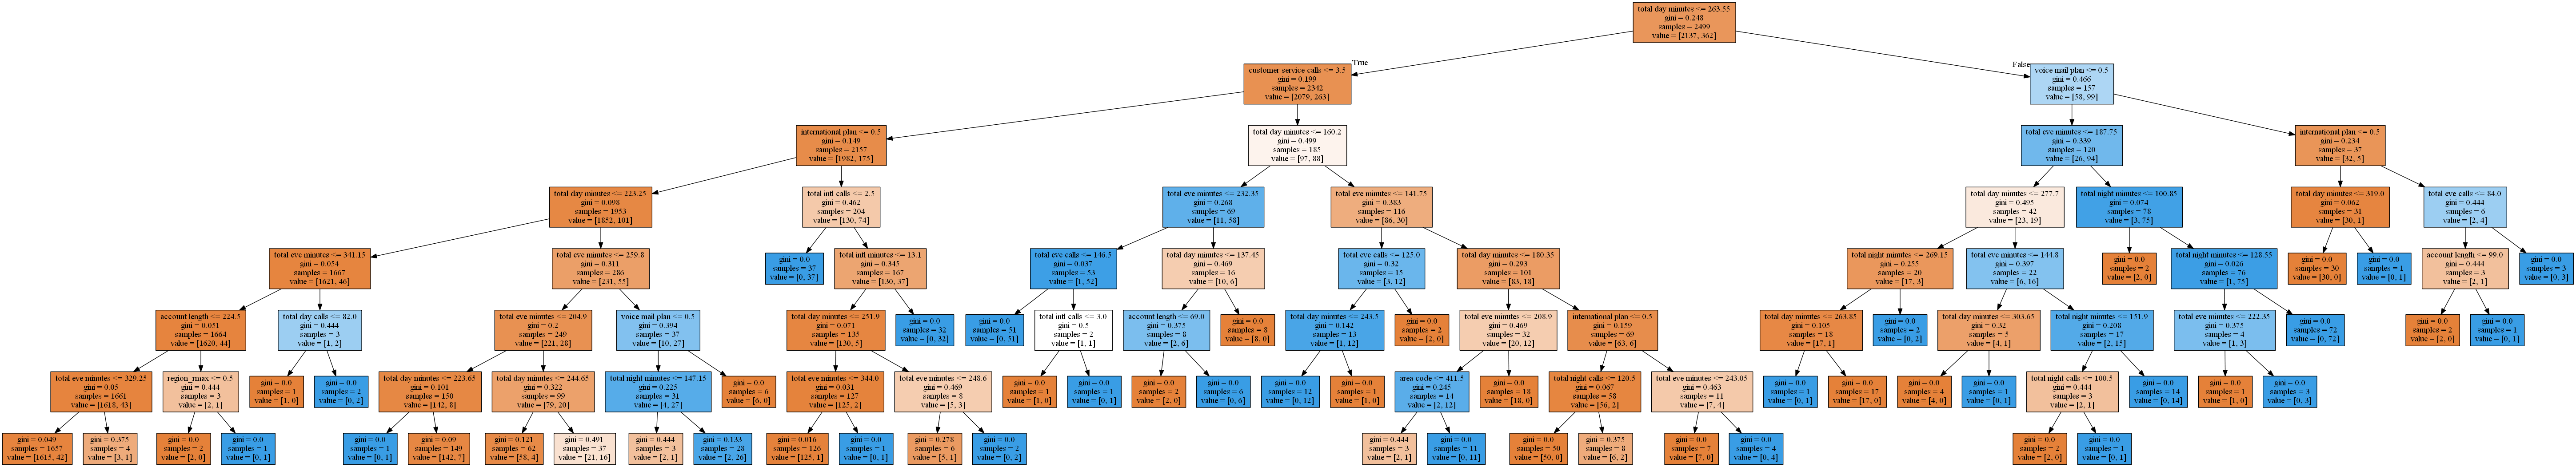

<Figure size 2520x1800 with 0 Axes>

In [106]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

model_tree = tree.export_graphviz(model, out_file=None, feature_names= x_train.columns, max_depth=7, filled=True)

graph = pydotplus.graph_from_dot_data(model_tree) 
plt.figure(figsize=(35,25))
# Show graph
Image(graph.create_png())

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [65]:
f1_scr = []
test_acc = []
for i in range(2,9):
    model = RandomForestClassifier(max_features= i, random_state=123)
    model.fit(x_train, y_train)
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))
    

C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\My Pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

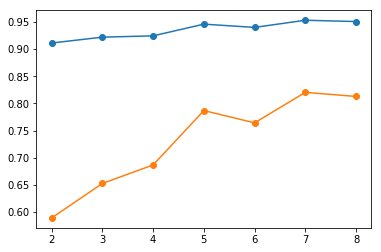

In [66]:
df = pd.DataFrame({'max_feature': range(2,9),'test_acc': test_acc, 'F1_score': f1_scr})


plt.plot(df['max_feature'], df['test_acc'], marker = 'o')
plt.plot(df['max_feature'], df['F1_score'], marker = 'o' )

In [67]:
df

,max_feature,test_acc,F1_score
0,2,0.911271,0.588889
1,3,0.922062,0.652406
2,4,0.924460,0.686567
3,5,0.946043,0.786730
4,6,0.940048,0.764151
5,7,0.953237,0.820276
6,8,0.950839,0.812785


In [62]:
f1_scr = []
test_acc = []
for i in range(100,200,10):
    model = RandomForestClassifier(max_features= 7, n_estimators=i, random_state=431)
    model.fit(x_train, y_train)
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))

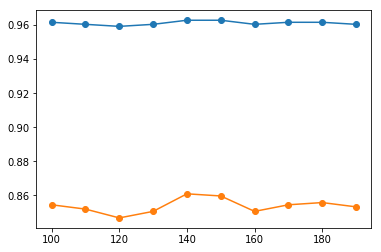

In [63]:
df = pd.DataFrame({'n_estimators': range(100,200,10),'test_acc': test_acc, 'F1_score': f1_scr})


plt.plot(df['n_estimators'], df['test_acc'], marker = 'o')
plt.plot(df['n_estimators'], df['F1_score'], marker = 'o' )

In [64]:
df

,n_estimators,test_acc,F1_score
0,100,0.961631,0.854545
1,110,0.960432,0.852018
2,120,0.959233,0.846847
3,130,0.960432,0.850679
4,140,0.962830,0.860987
5,150,0.962830,0.859729
6,160,0.960432,0.850679
7,170,0.961631,0.854545
8,180,0.961631,0.855856
9,190,0.960432,0.853333


In [71]:
f1_scr = []
test_acc = []
for i in range(2,20):
    model = RandomForestClassifier(max_features= 7, n_estimators=140, min_samples_leaf=i, random_state=431)
    model.fit(x_train, y_train)
    test_acc.append(model.score(x_test, y_test))
    f1_scr.append(f1_score(y_test, model.predict(x_test)))

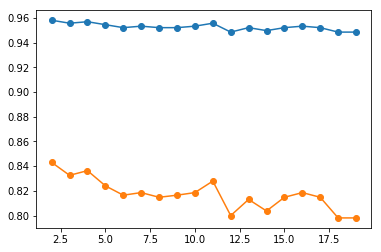

In [72]:
df = pd.DataFrame({'min_samples_leaf': range(2,20),'test_acc': test_acc, 'F1_score': f1_scr})


plt.plot(df['min_samples_leaf'], df['test_acc'], marker = 'o')
plt.plot(df['min_samples_leaf'], df['F1_score'], marker = 'o' )

In [85]:
df

,min_samples_leaf,test_acc,F1_score
0,2,0.958034,0.843049
1,3,0.955635,0.832579
2,4,0.956835,0.836364
3,5,0.954436,0.824074
4,6,0.952038,0.816514
5,7,0.953237,0.818605
6,8,0.952038,0.814815
7,9,0.952038,0.816514
8,10,0.953237,0.818605
9,11,0.955635,0.827907


In [80]:
model = RandomForestClassifier(max_features= 7, n_estimators=140, random_state=431, oob_score=True)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
print(f1_score(y_test, model.predict(x_test)))

0.9628297362110312
0.8609865470852018


In [81]:
print(confusion_matrix(y_test, model.predict(x_test)))

[[707   6]
 [ 25  96]]


In [82]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       713
           1       0.94      0.79      0.86       121

    accuracy                           0.96       834
   macro avg       0.95      0.89      0.92       834
weighted avg       0.96      0.96      0.96       834

